[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


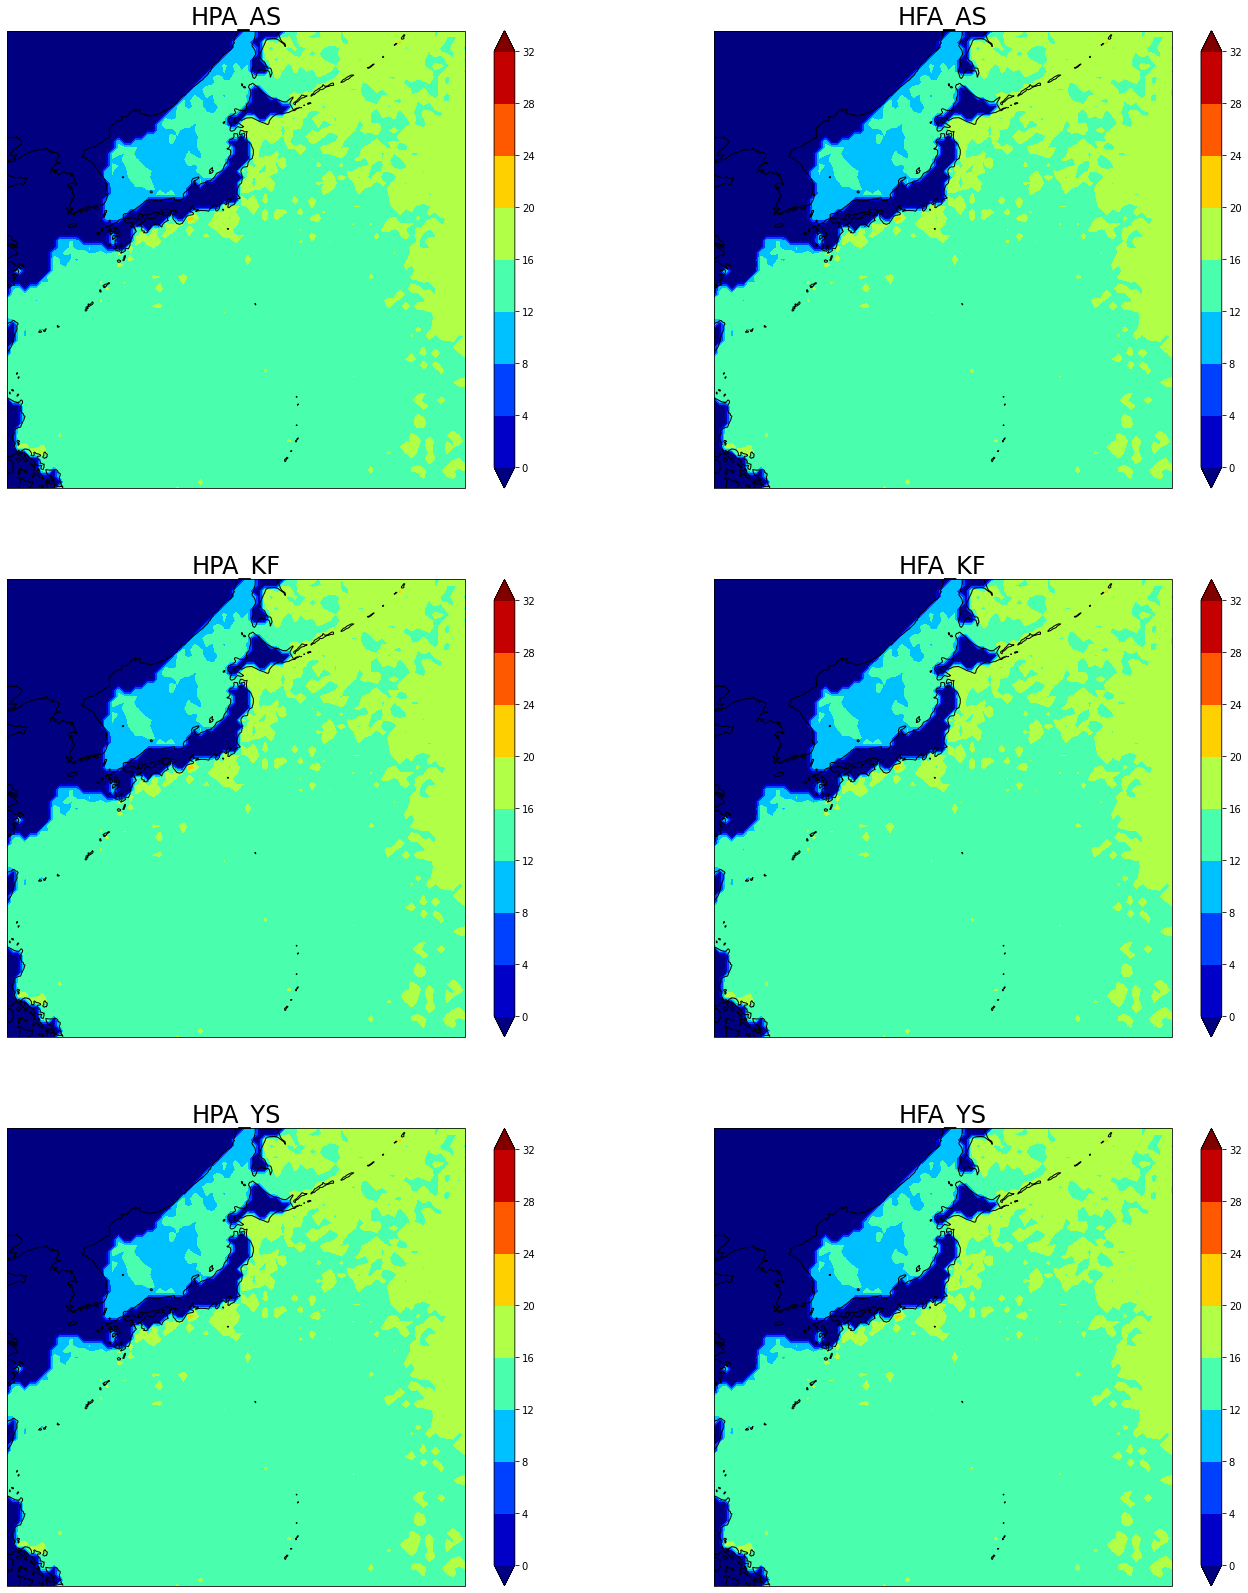

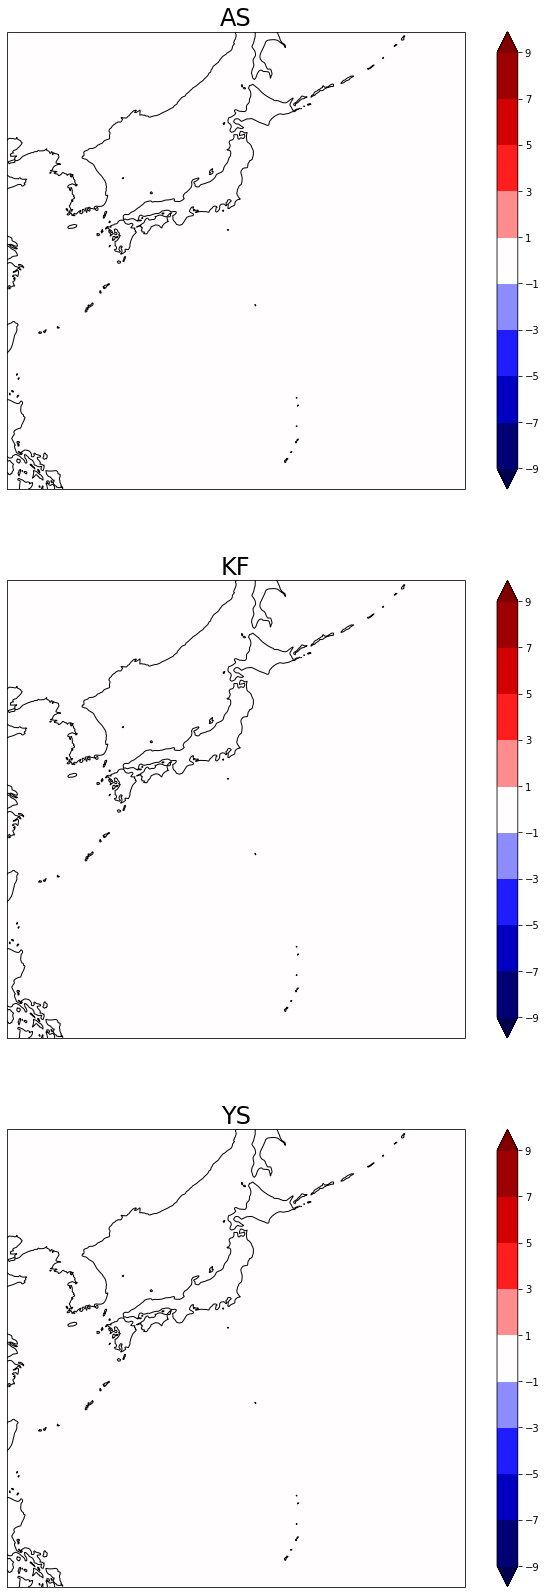

In [4]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import copy


"""モデル間のRV比較の図を出力"""

MODEL = ['AS', 'KF', 'YS']

with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)

for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

lat_s = lats[0][0]
lat_n = lats[0][-1]
lon_w = lons[0][0]
lon_e = lons[-1][0]

DATA_F = []
DATA_P = []

with open('RV_csv/HFA_AS_10RV.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_F.append(list(csv_reader))
with open('RV_csv/HPA_AS_10RV.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_P.append(list(csv_reader))
with open('RV_csv/HFA_KF_10RV.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_F.append(list(csv_reader))
with open('RV_csv/HPA_KF_10RV.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_P.append(list(csv_reader))
with open('RV_csv/HFA_YS_10RV.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_F.append(list(csv_reader))
with open('RV_csv/HPA_YS_10RV.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_P.append(list(csv_reader))

# str → float
for i in range(79):
    for j in range(79):
        for k in range(3):
            DATA_F[k][i][j] = float(DATA_F[k][i][j])
            DATA_P[k][i][j] = float(DATA_P[k][i][j])

for i in range(3):
    DATA_F[i] = np.array(DATA_F[i])
    DATA_P[i] = np.array(DATA_P[i])

print(DATA_F[1] == DATA_F[0])
# 描画(現在気候のRV)
fig = plt.figure(figsize=(20, 24))
levels = np.arange(0, 33, 4)
ax1 = fig.add_subplot(3, 2, 1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, DATA_P[0], levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c_bar = plt.colorbar(a)
ax1.coastlines()
ax1.set_title('HPA_' + MODEL[0], fontsize=24)

ax2 = fig.add_subplot(3, 2, 3, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_P[1], levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c_bar = plt.colorbar(a)
ax2.coastlines()
ax2.set_title('HPA_' + MODEL[1], fontsize=24)

ax3 = fig.add_subplot(3, 2, 5, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_P[2], levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c_bar = plt.colorbar(a)
ax3.coastlines()
ax3.set_title('HPA_' + MODEL[2], fontsize=24)

# 描画(将来気候のRV)
ax4 = fig.add_subplot(3, 2, 2, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, DATA_F[0], levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c_bar = plt.colorbar(a)
ax4.coastlines()
ax4.set_title('HFA_' + MODEL[0], fontsize=24)

ax5 = fig.add_subplot(3, 2, 4, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_F[1], levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c_bar = plt.colorbar(a)
ax5.coastlines()
ax5.set_title('HFA_' + MODEL[1], fontsize=24)

ax6 = fig.add_subplot(3, 2, 6, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_F[2], levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c_bar = plt.colorbar(a)
ax6.coastlines()
ax6.set_title('HFA_' + MODEL[2], fontsize=24)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.savefig("../img/現在気候と将来気候の10年再現期待値.png")
plt.show()

# 描画(将来気候と現在気候の最大波高の差)
fig = plt.figure(figsize=(10, 24))
levels = np.arange(-9, 10, 2)
cmap = copy.copy(mpl.cm.get_cmap("seismic"))
print(cmap)
ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, DATA_F[0] - DATA_P[0], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')
c_bar = plt.colorbar(a)
ax1.coastlines()
ax1.set_title(MODEL[0], fontsize=24)

ax2 = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_F[1] - DATA_P[1], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')
c_bar = plt.colorbar(a)
ax2.coastlines()
ax2.set_title(MODEL[1], fontsize=24)

ax3 = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_F[2] - DATA_P[2], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')
c_bar = plt.colorbar(a)
ax3.coastlines()
ax3.set_title(MODEL[2], fontsize=24)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.savefig("../img/10年再現期待値の変化.png")
plt.show()